In [1]:
import pandas as pd
idx = pd.IndexSlice

In [2]:
raw_data = pd.read_csv('./data/EF_battles_corrected.csv', parse_dates=['start', 'end'])

In [3]:
import altair as alt
# alt.renderers.enable('notebook')


In [15]:
cols = ['name','allies killed', 'axis killed', 
        'allies tanks', 'axis tanks', 'allies airplane', 'axis airplane',
        'Lattitude', 'Longitude', 'start', 'end', 'Location',  'url', 'parent', 'result']

In [21]:
data = raw_data[cols]
data['result'].fillna('tie', inplace=True)

/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
data['killed total'] = data[['allies killed', 'axis killed']].sum(1)

/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
data.head(3)

,name,allies killed,axis killed,allies tanks,axis tanks,allies airplane,axis airplane,Lattitude,Longitude,start,end,Location,url,parent,result,killed total
0,Battle of Westerplatte,21.0,400.0,0,0,0,0,54.4075,18.67139,1939-09-01,1939-09-01,"Westerplatte, harbor of Free City of Danzig54°...",https://en.wikipedia.org/wiki/Battle_of_Wester...,German Invasion of Poland,axis,421.0
1,Battle of Mokra,500.0,800.0,1,50,0,0,NaN,NaN,1939-09-01,1939-09-01,"Mokra, Kielce Voivodeship, Poland",https://en.wikipedia.org/wiki/Battle_of_Mokra,German Invasion of Poland,allies,1300.0
2,Battle of Mlawa,1200.0,1800.0,0,72,0,0,NaN,NaN,1939-09-01,1939-09-01,"Near Mława, Warsaw Voivodeship, Poland",https://en.wikipedia.org/wiki/Battle_of_Mlawa,German Invasion of Poland,axis,3000.0


# Scatterplot

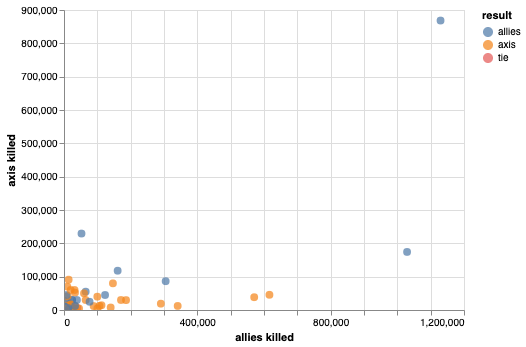

In [25]:
alt.Chart(data).mark_circle(size=60).encode(
    x='allies killed',
    y='axis killed',
    color='result',
    tooltip=['name', 'allies killed', 'axis killed', 'start']
).interactive()

# Map

In [26]:
url = 'https://unpkg.com/world-atlas@1/world/50m.json'

In [27]:
data_geo = alt.topo_feature(url, feature='countries')
proj = {'center':[10, 52], 'type':'conicEquidistant', 'scale':800}

# plot map, where variables ares nested within `properties`, 
basemap = alt.Chart(data_geo).mark_geoshape(
    clip=True,
    fill='lightgray',
    stroke='white',
  
).properties(
    width=700,
    height=700,
).project(**proj)



mask = data[['Lattitude', 'Longitude']].notnull().all(1)
points = alt.Chart(data[mask]).mark_circle(clip=True, color='red', opacity=.5).encode(
    latitude='Lattitude',
    longitude='Longitude',
    size=alt.Size('killed total:Q', scale=alt.Scale(type='linear', range=[10, 1000], domain=[10, 1_500_000]), title='Casualties'),
    color='result',
    tooltip=['name', 'killed total'],
    href = 'url'
).project(**proj)

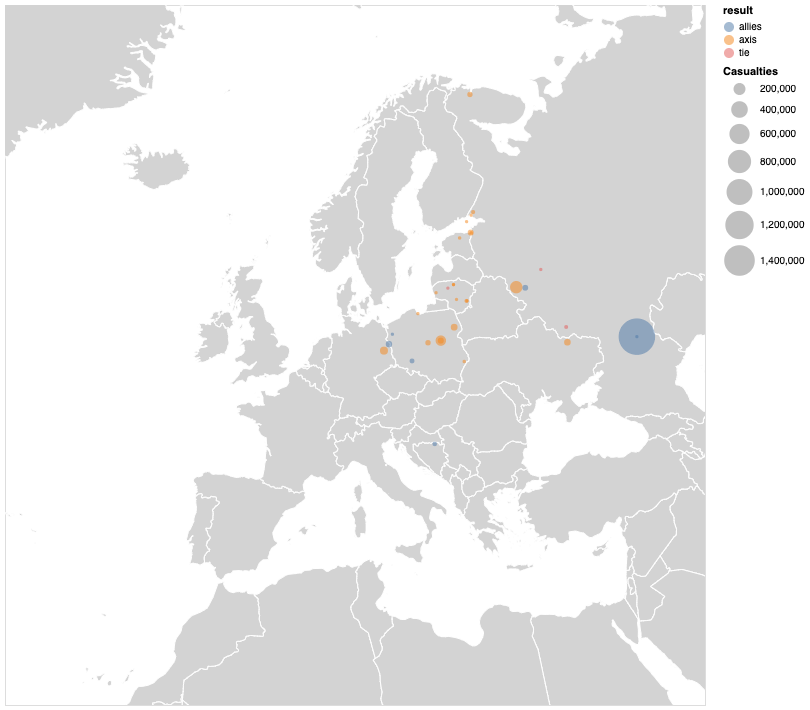

In [28]:
(basemap + points)

In [14]:
C = (basemap + points)

In [15]:
C.save('chart.html')